# **YOLO Parking Slot Counter** Project

YOLOv5 is used to detect vehicles in a parking lot and estimate the number of available parking slots.  

YOLOv5를 이용하여 주차 공간의 점유 상태를 간단하게 탐지하는 프로젝트입니다.


## 1 YOLOv5 Installation

Clone the YOLOv5 repository and install the required packages.  

YOLOv5 저장소를 복제하고 필요한 패키지를 설치합니다.

### 1.1 YOLOv5 Repository Clone
To begin, the official YOLOv5 repository is cloned from GitHub. This repository includes configuration files, and scripts required for object detection.  

GitHub에서 공식 YOLOv5 저장소를 복제하여 시작합니다. 이 저장소에는 객체 탐지를 위한 스크립트 및 설정 파일이 포함되어 있습니다.

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17478, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 17478 (delta 80), reused 37 (delta 32), pack-reused 17358 (from 2)
Receiving objects: 100% (17478/17478), 16.31 MiB | 7.67 MiB/s, done.
Resolving deltas: 100% (11980/11980), done.


### 1.2 Move into the YOLOv5 Directory

The working directory is changed to the cloned yolov5 folder so that we can access and run its scripts.  

작업 디렉토리를 복제한 yolov5 폴더로 변경하여 YOLOv5 스크립트를 실행할 수 있도록 합니다.

In [2]:
%cd yolov5

/content/yolov5


### 1.3 Install Required Dependencies

YOLOv5 relies on several Python packages such as torch, numpy, opencv, and matplotlib. These dependencies are installed using the provided **requirements.txt** file.  

YOLOv5는 torch, numpy, opencv, matplotlib 등 여러 Python 패키지에 의존합니다. 제공된 **requirements.txt** 파일을 사용하여 이들을 설치합니다.

In [3]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

## 2. Environment Setup and Image Preview

Initialize the notebook environment and display the test image.  

Colab 환경을 초기화하고 테스트 이미지를 불러옵니다.

### 2.1 Uploading Required Files

Before detection, the test image needs to be uploaded to the correct directory. Manually upload the test image and the updated **detect.py** file using the file browser. Make sure the image is placed in */content/yolov5/data/images* and the **detect.py** file is placed in */content/yolov5*.  

탐지에 앞서 테스트 이미지를 알맞은 디렉토리에 업로드해야 합니다. 파일 브라우저를 사용하여 테스트 이미지와 수정된 **detect.py** 파일을 직접 업로드합니다. 이미지는 */content/yolov5/data/images* 폴더에, **detect.py** 파일은 */content/yolov5* 폴더에 위치해야 합니다.

### 2.2 Image Preview

The image is displayed to observe the initial parking lot state. This helps in visually comparing the input and output.  

테스트 이미지를 표시하여 주차장의 초기 상태를 확인합니다. 이를 통해 입력 이미지와 결과 이미지를 시각적으로 비교할 수 있습니다.

YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/107.7 GB disk)


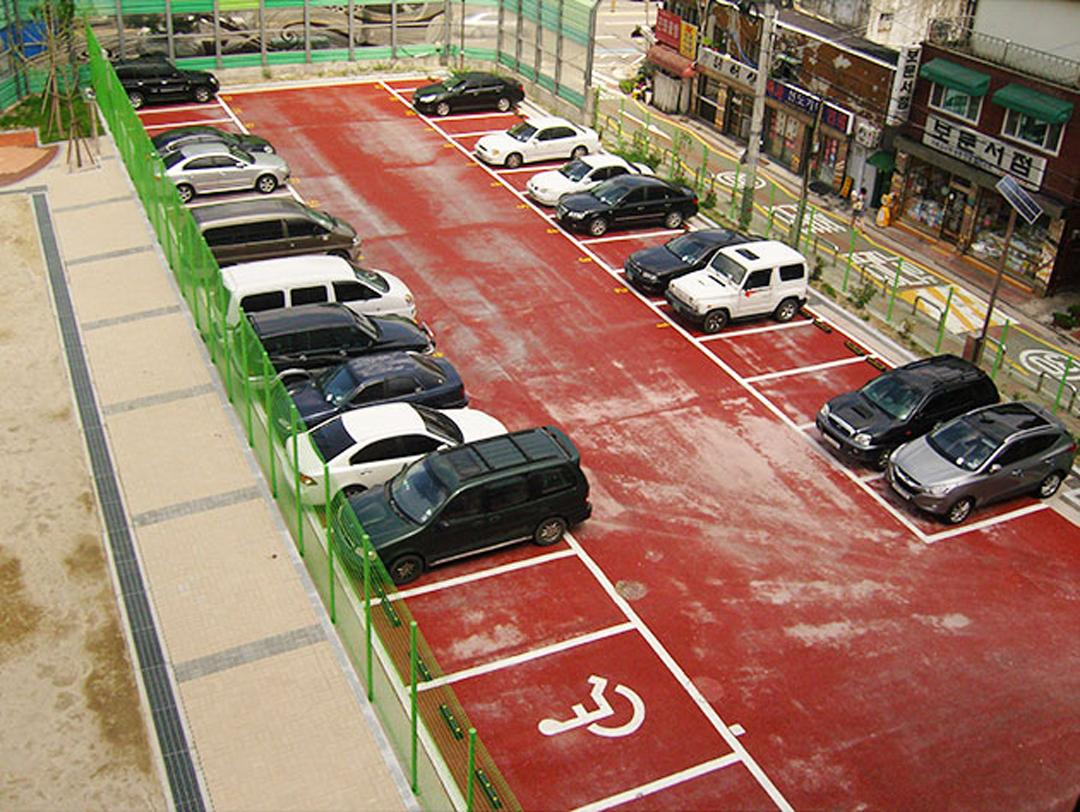

In [18]:
import torch
import utils
display = utils.notebook_init()

display.Image(filename='/content/yolov5/data/images/parking_lot_test.jpg', width=600)

## 3. Execute Vehicle Detection (YOLOv5)  

The YOLOv5 model is used to detect vehicles (classes: car, motorcycle, bus, truck).
A lower confidence threshold (--conf-thres 0.13) is used to ensure more detections in challenging angles.  

YOLOv5 모델을 사용하여 차량(클래스: 자동차, 오토바이, 버스, 트럭)을 탐지합니다.
사진의 각도에 따라 탐지가 어려울 수 있어 더 많은 객체를 탐지하기 위해 낮은 confidence threshold(--conf-thres 0.13)를 사용했습니다.

In [24]:
!python detect.py --weights yolov5s.pt --source '/content/yolov5/data/images/parking_lot_test.jpg' --classes 2 3 5 7 --conf-thres 0.13

detect: weights=['yolov5s.pt'], source=/content/yolov5/data/images/parking_lot_test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.13, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=[2, 3, 5, 7], agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs

--- Parking Situation ---
Total Slots     : 33
Occupied Slots  : 17
Empty Slots     : 16
16 slots available.

image 1/1 /content/yolov5/data/images/parking_lot_test.jpg: 512x640 456.0ms
Speed: 3.8ms pre-process, 456.0ms inference, 2.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


## 4. Result Image Preview

Check the output image showing detected vehicles.  

탐지된 차량이 표시된 결과 이미지를 확인합니다.


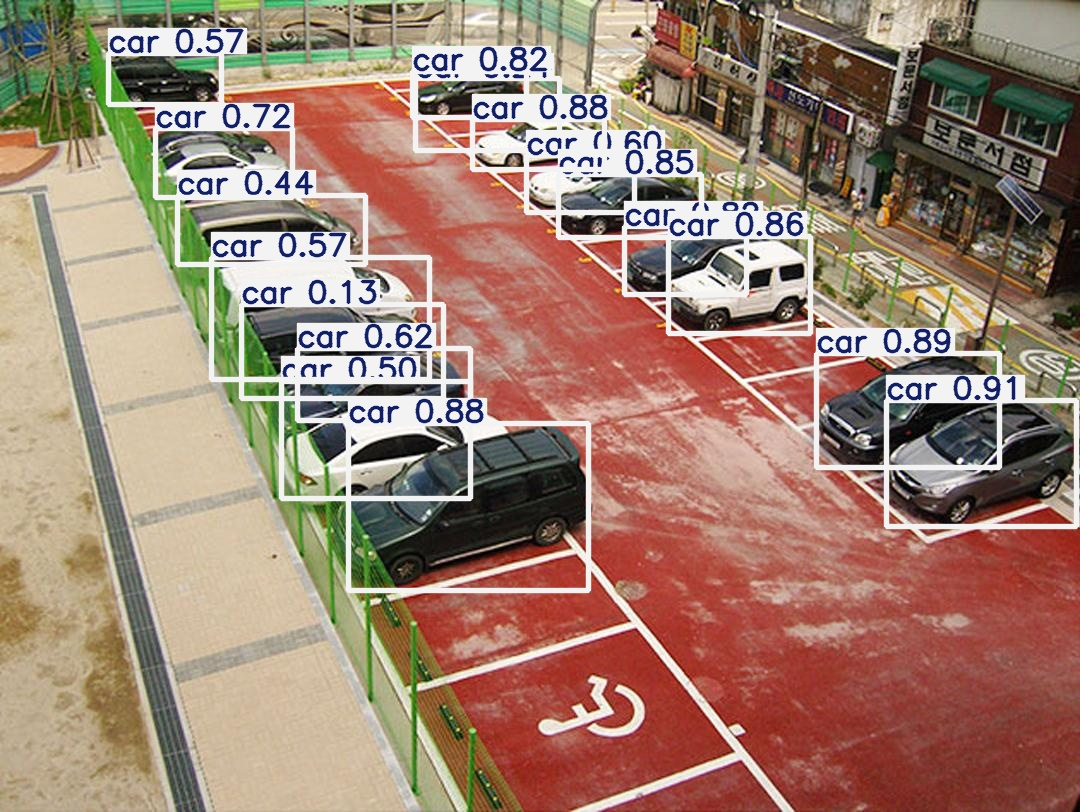

In [25]:
display.Image(filename='/content/yolov5/runs/detect/exp/parking_lot_test.jpg', width=600)

## 5. Summary

This project shows how small changes in YOLOv5 can effectively monitor parking lot status by counting detected vehicles and estimating available spaces. Although this project may not yet be fully utilizable in practice, it demonstrates potential for further improvements and real-world implementation.  

YOLOv5의 간단한 수정만으로도 주차장 내 차량 수를 빠르게 파악하고 빈 주차 공간의 개수를 효과적으로 추정할 수 있었습니다. 아직 이 프로젝트가 실제 현장에서 바로 활용되기에는 부족한 점이 있지만 추가적인 개선과 보완을 통해 실용적인 시스템으로 발전할 가능성을 보여주었습니다.